In [103]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# from pylab import rcParams
# pylab.rcParams['figure.figsize'] = (10, 10)
import os

NameError: name 'pylab' is not defined

In [104]:
os.chdir("D:\DATA ANALYTICS\Kaggle\Bike Sharing")
os.listdir()

['.ipynb_checkpoints',
 'Jimmy Du, Rolland He, Zhivko Zhechev, Forecasting Bike Rental Demand.pdf',
 'Mahmood Alhusseini,Prediction of Bike Sharing Demand for Casual and Registered Users.pdf',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [105]:
dateparser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
bike_train = pd.read_csv('train.csv', parse_dates = ['datetime'], date_parser = dateparser)
bike_train.shape

(10886, 12)

In [106]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [100]:
bike_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [101]:
bike_sub = bike_train
bike_sub["day"] = pd.DatetimeIndex(bike_sub['datetime']).day
bike_sub["month"] = pd.DatetimeIndex(bike_sub['datetime']).month
bike_sub["year"] = pd.DatetimeIndex(bike_sub['datetime']).year
bike_sub.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,1,1,2011


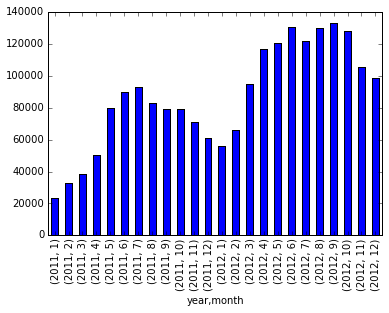

In [102]:
bike_sub_count_month = bike_sub.groupby(['year', 'month'])['count'].sum()
bike_sub_count_month.plot(kind='bar')
## plotting the number of bike sharing counts according to months in teh year 2001 & 12